In [84]:
#importar las librerias necesarias
from sklearn import neighbors
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

In [85]:
#Data frame
df = pd.read_csv('Expanded_data_with_more_features.csv')

In [86]:
df.tail()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93
30640,960,male,group B,some college,standard,none,married,never,no,1.0,school_bus,5 - 10,64,60,58


In [87]:
df.Gender.unique()

array(['female', 'male'], dtype=object)

In [88]:
#Mapear df.Gender a 0 y 1
df.Gender = df['Gender'].map({'male':0,'female':1})


In [89]:
df.EthnicGroup.unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [90]:
#df.EthnicGroup = df['EthnicGroup'].map({}) #Al ver que tengo valores nulos, decido no tomar la tabla.

In [91]:
df.drop(['ParentMaritalStatus','PracticeSport','EthnicGroup','ParentEduc','TransportMeans'], axis=1, inplace=True)

In [92]:
#El mismo caso con ParentEduc. Decido no tomar la tabla.

In [93]:
#Convierto en none los valores nulos en none
df.TestPrep = df['TestPrep'].fillna('none')

In [94]:
df.TestPrep.unique()

array(['none', 'completed'], dtype=object)

In [95]:
df.TestPrep = df['TestPrep'].map({'none':0,'completed':1})

In [96]:
#Mapeo los valores de LunchType a 0 y 1:
df.LunchType = df['LunchType'].map({'free/reduced':0,'standard':1})

In [97]:
#Drope los valores nulos en IsFirstChild
df.dropna(subset=['IsFirstChild'], inplace=True)

In [98]:
#Drop de los valores nulos en NrSiblings
df.dropna(subset=['NrSiblings'], inplace=True)

In [99]:
#Mapear los valores de WklyStudyHours 
df.WklyStudyHours.unique()

array(['< 5', '5 - 10', '> 10', nan], dtype=object)

In [100]:
df.WklyStudyHours = df['WklyStudyHours'].map({'< 5':0,'5 - 10':1,'> 10':2})

In [101]:
#Colocar media a los valores nulos de WklyStudyHours
df.WklyStudyHours = df['WklyStudyHours'].fillna(df['WklyStudyHours'].mean())

In [102]:
df.describe()

,Unnamed: 0,Gender,LunchType,TestPrep,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
count,28219.000000,28219.000000,28219.000000,28219.000000,28219.000000,28219.000000,28219.000000,28219.000000,28219.000000
mean,500.145753,0.503668,0.650271,0.324037,2.153726,0.897190,66.576278,69.407102,68.453666
std,288.942824,0.499995,0.476893,0.468022,1.457299,0.653344,15.316331,14.739926,15.431372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,4.000000
25%,250.000000,0.000000,0.000000,0.000000,1.000000,0.000000,56.000000,59.000000,58.000000
50%,500.000000,1.000000,1.000000,0.000000,2.000000,1.000000,67.000000,70.000000,69.000000
75%,751.000000,1.000000,1.000000,1.000000,3.000000,1.000000,78.000000,80.000000,79.000000
max,999.000000,1.000000,1.000000,1.000000,7.000000,2.000000,100.000000,100.000000,100.000000


In [109]:
df.dtypes

Gender              int64
LunchType           int64
TestPrep            int64
IsFirstChild        int64
NrSiblings        float64
WklyStudyHours    float64
MathScore           int64
ReadingScore        int64
WritingScore        int64
dtype: object

In [104]:
df.IsFirstChild.dropna(inplace=True)

In [105]:
df.IsFirstChild  = df['IsFirstChild'].map({'yes':0,'no':1})

In [106]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [115]:
#Inicializar el modelo
k_neighbors = neighbors.KNeighborsRegressor(n_neighbors=5)

In [116]:
# Preparar la data para entrenar el modelo
data_x = df.drop(['MathScore'], axis=1)
data_y = df['MathScore']
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.1)

In [117]:
k_neighbors.fit(train_x, train_y)

KNeighborsRegressor()

In [118]:
print(k_neighbors.score(test_x, test_y))

0.78140301214835


In [168]:
df.dtypes

Gender              int64
LunchType           int64
TestPrep            int64
IsFirstChild        int64
NrSiblings        float64
WklyStudyHours    float64
MathScore           int64
ReadingScore        int64
WritingScore        int64
dtype: object

In [170]:
Gender = 0
LunchType = 0
TestPrep = 0
IsFirstChild = 0
NrSiblings = 0
WklyStudyHours = 1
ReadingScore = 70
WritingScore = 80

In [172]:
predicted = k_neighbors.predict([[Gender, LunchType, TestPrep, IsFirstChild, NrSiblings, WklyStudyHours, ReadingScore, WritingScore]])
print(f'Una persona con esas características tiene {predicted[0]} de nota en el examen de matematicas.')


Una persona con esas características tiene 66.6 de nota en el examen de matematicas.


c:\Semestre 1 2023\classifiers\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


## Decision Tree

In [119]:
import seaborn as sb

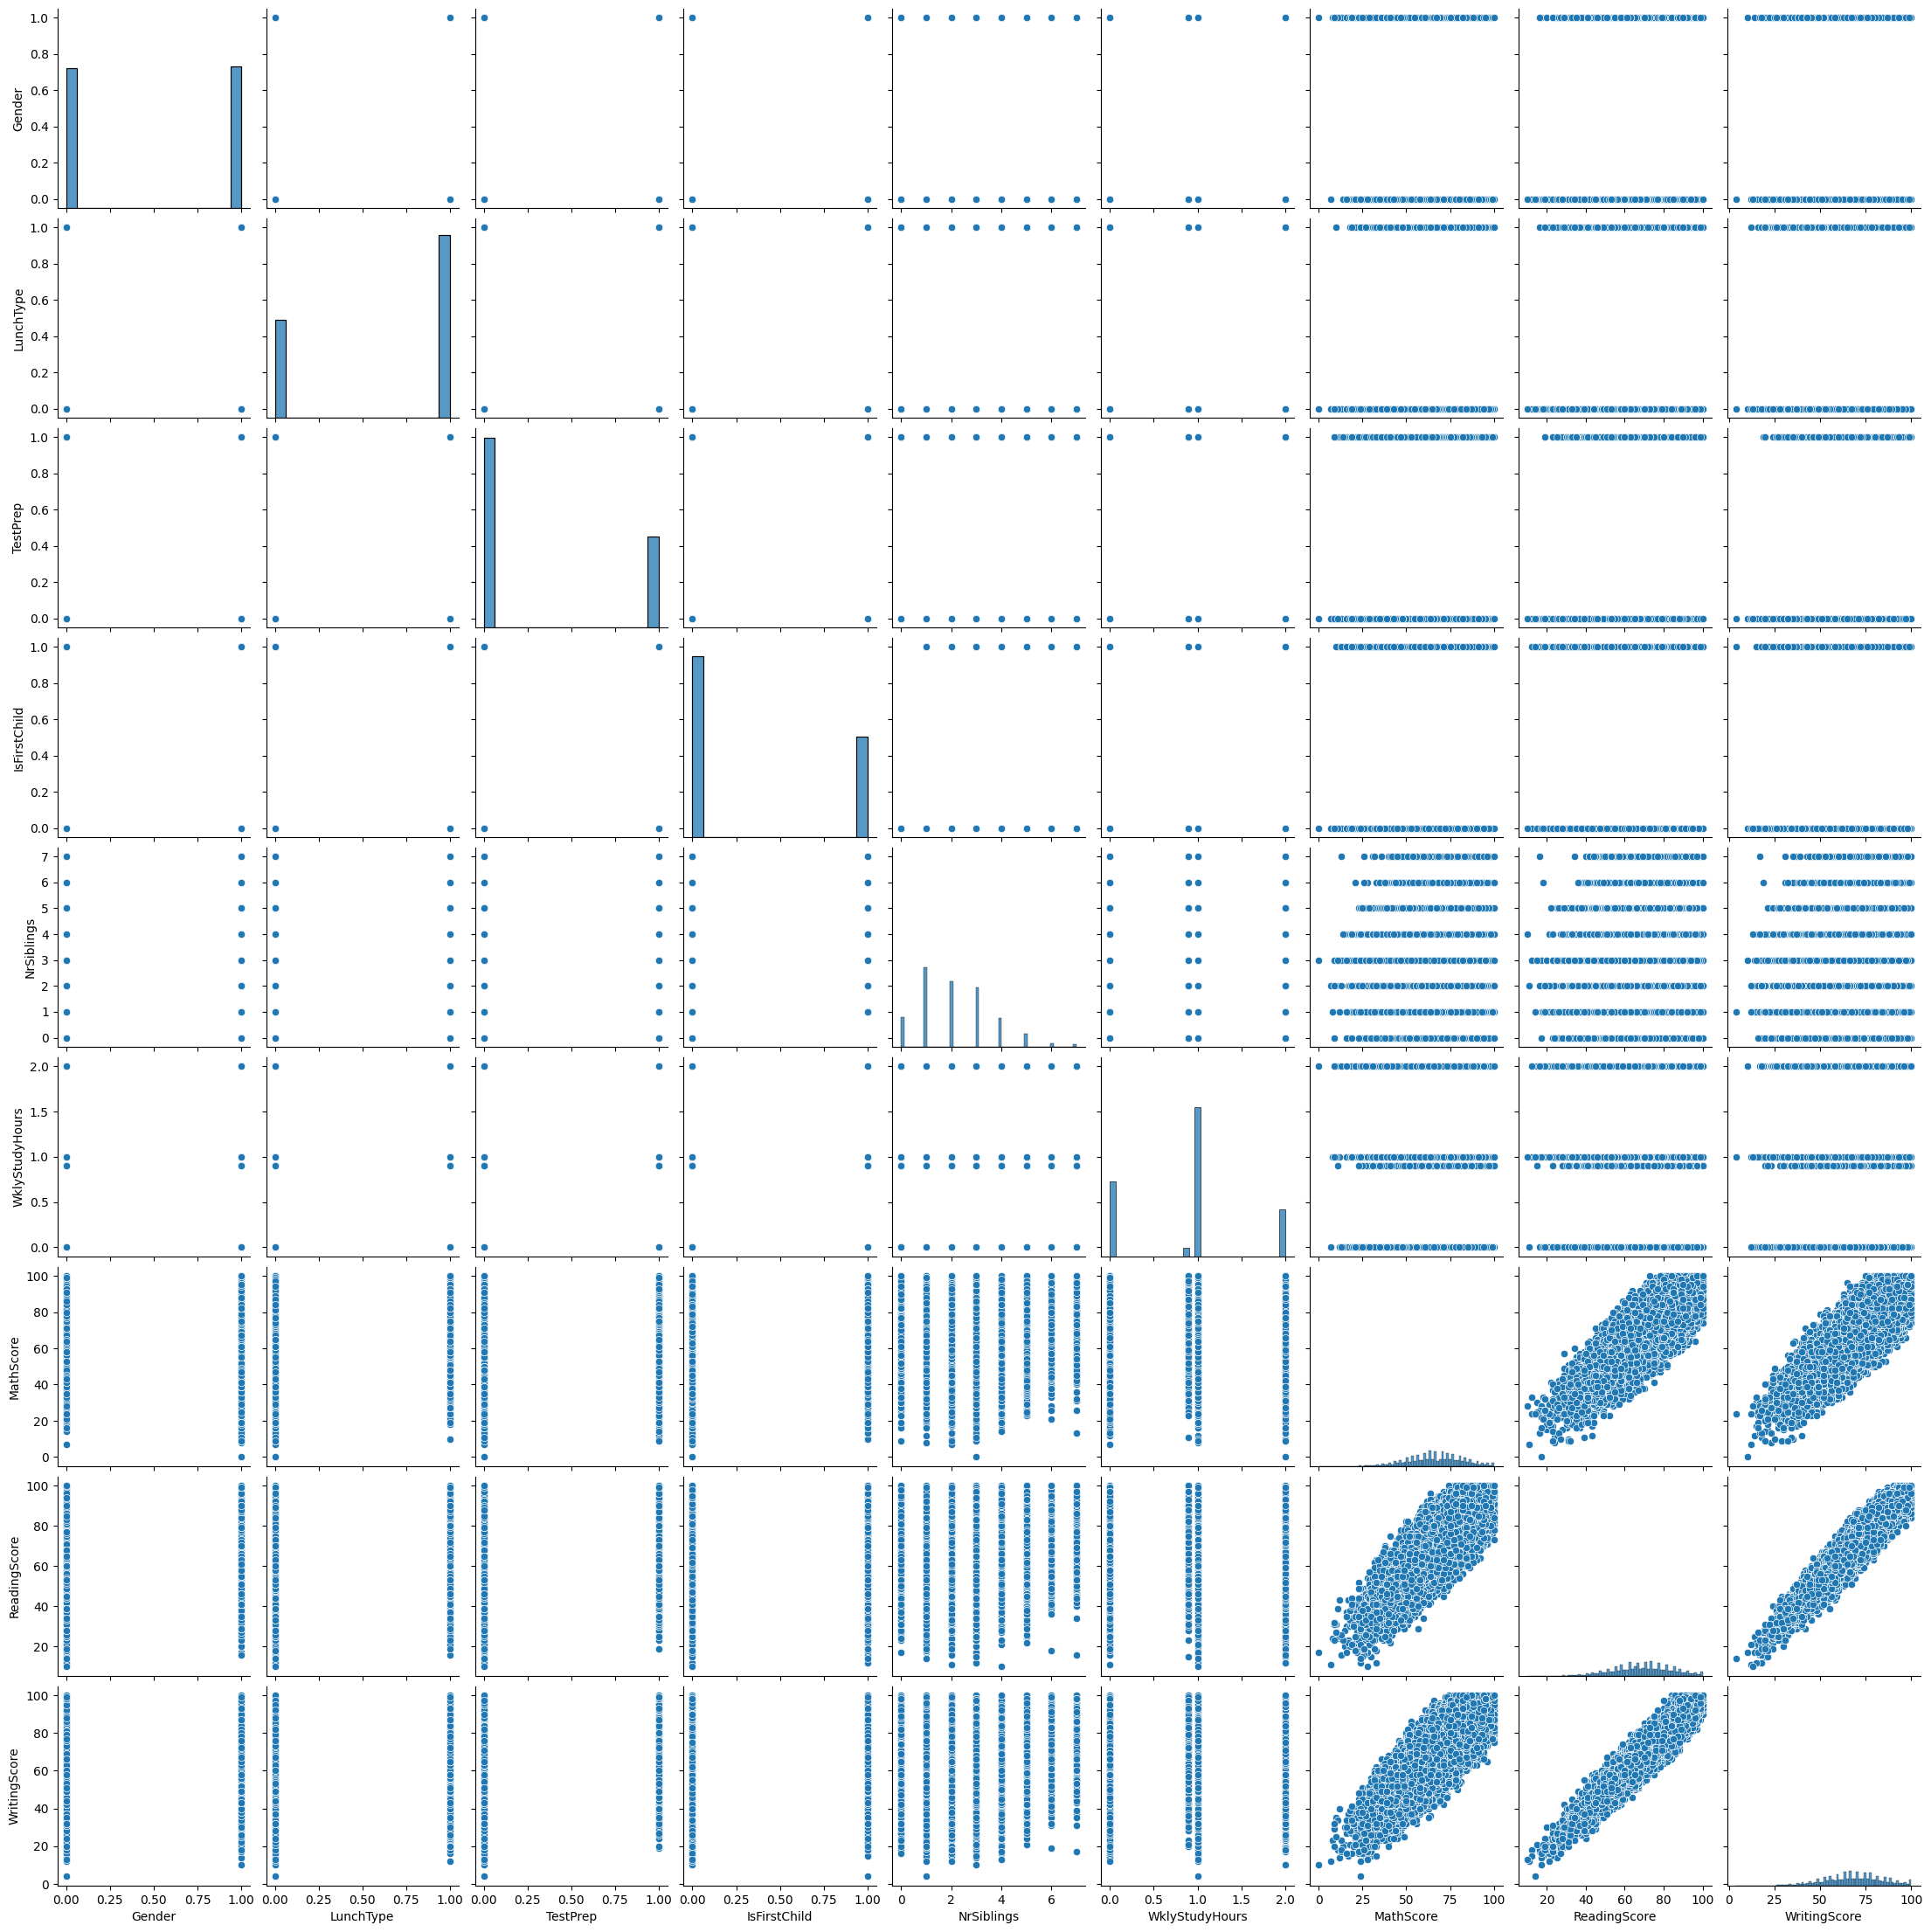

In [120]:
sb.pairplot(df)

In [123]:
from sklearn import tree


In [151]:
# Preparar la data para entrenar el modelo Tree
data_x_tree = df.drop(['NrSiblings','Gender'], axis=1)
data_y_tree = df['Gender']
train_x_tree, test_x_tree, train_y_tree, test_y_tree = train_test_split(data_x_tree, data_y_tree, test_size=0.1)

In [152]:
decission_tree = tree.DecisionTreeClassifier()

In [153]:
decission_tree.fit(train_x_tree, train_y_tree)

DecisionTreeClassifier()

In [154]:
print(f'Score: {round(decission_tree.score(test_x_tree, test_y_tree) , 4) * 100.0}%')

Score: 82.14%


In [165]:
genres_tree = {0: 'masculino', 1: 'femenino'}
LunchType_tree = 0
TestPrep_tree = 0
IsFirstChild_tree = 0
WklyStudyHours_tree = 1
MathScore_tree = 90
ReadingScore_tree = 70
WritingScore_tree = 80

In [156]:
df.dtypes

Gender              int64
LunchType           int64
TestPrep            int64
IsFirstChild        int64
NrSiblings        float64
WklyStudyHours    float64
MathScore           int64
ReadingScore        int64
WritingScore        int64
dtype: object

In [166]:
predicted_tree = decission_tree.predict([[LunchType_tree, TestPrep_tree, IsFirstChild_tree, WklyStudyHours_tree, MathScore_tree, ReadingScore_tree, WritingScore_tree]])
print(f'Una persona con esas características es: {genres_tree[predicted_tree[0]]}')


Una persona con esas características es: masculino


c:\Semestre 1 2023\classifiers\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
